In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-1f955a3a-7098-45df-8fa6-1b4cbb3dcde8',
    'IBM_API_KEY_ID': '4h89zy6XQw8XFpDmrC0Yq4GaWokwcsbWxVaxKBHu5Ene',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'flightdelayprediction-donotdelete-pr-wwd2bafrgsjxs0',
    'FILE': 'flightdata.csv'
}


# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_28e23971882d442faccd7ec873cbb875 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4h89zy6XQw8XFpDmrC0Yq4GaWokwcsbWxVaxKBHu5Ene',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_28e23971882d442faccd7ec873cbb875.get_object(Bucket='flightdelayprediction-donotdelete-pr-wwd2bafrgsjxs0',Key='flightdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset= pd.read_csv(body)
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [2]:
dataset.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

In [3]:
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [4]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [5]:
dataset = dataset.drop('Unnamed: 25', axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [6]:
import seaborn as sns
%matplotlib inline

In [7]:
#dataset= pd.read_csv(body)

<AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

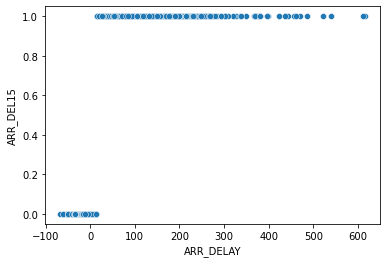

In [8]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=dataset)

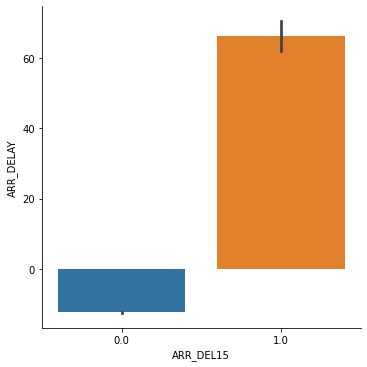

In [9]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=dataset)

<AxesSubplot:>

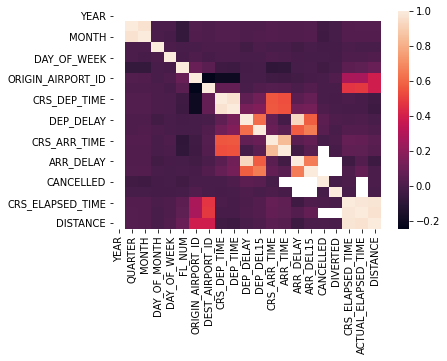

In [10]:
sns.heatmap(dataset.corr())

In [11]:
#filter the dataset to eliminate columns that aren't relevant to a predictive model.
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [12]:
dataset[dataset.isnull().any(axis=1)].head(10)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
179,86,1,10,7,MSP,DTW,1632,NaN,NaN
184,557,1,10,7,MSP,DTW,912,0.0,NaN
210,1096,1,10,7,DTW,MSP,1303,NaN,NaN
478,1542,1,22,5,SEA,JFK,723,NaN,NaN
481,1795,1,22,5,ATL,JFK,2014,NaN,NaN
491,2312,1,22,5,MSP,JFK,2149,NaN,NaN
499,423,1,23,6,JFK,ATL,1600,NaN,NaN
500,425,1,23,6,JFK,ATL,1827,NaN,NaN
501,427,1,23,6,JFK,SEA,1053,NaN,NaN


In [13]:
dataset['DEP_DEL15'].mode()

0    0.0
dtype: float64

In [14]:
#replace the missing values with 1s.
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [15]:
import math

for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [17]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [18]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [19]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [20]:
x

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [21]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [22]:
x.shape

(11231, 8)

In [23]:
y.shape

(11231, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()
#x=np.delete(x,[4,7],axis=1) 

In [25]:
z

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
t

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
import numpy as np
x=np.delete(x,[4,5],axis=1) 

In [28]:
x.shape

(11231, 6)

In [29]:
x=np.concatenate((t,z,x),axis = 1)

In [30]:
x.shape

(11231, 29)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_test.shape

(2247, 29)

In [33]:
x_train.shape

(8984, 29)

In [34]:
y_test.shape

(2247, 1)

In [35]:
y_train.shape

(8984, 1)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
decisiontree = classifier.predict(x_test)

In [39]:
decisiontree

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [40]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [41]:
desacc

0.9897641299510458

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,decisiontree)

In [43]:
cm

array([[1790,   12],
       [  11,  434]])

In [44]:
import sklearn.metrics as metrics
fpr1 ,tpr1 ,threshold1 =metrics.roc_curve(y_test,decisiontree)
roc_auc1 = metrics.auc(fpr1,tpr1)

In [45]:
fpr1

array([0.        , 0.00665927, 1.        ])

In [46]:
tpr1

array([0.       , 0.9752809, 1.       ])

In [47]:
threshold1

array([2, 1, 0])

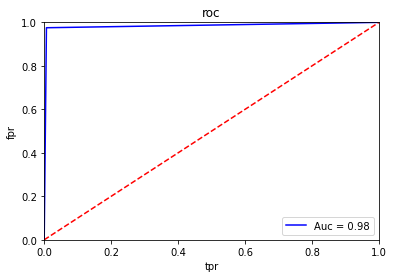

In [48]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [49]:
import pickle
pickle.dump(classifier,open('flight.pkl','wb'))

In [50]:
import ibm_watson_machine_learning

In [51]:
from ibm_watson_machine_learning import APIClient
import json

In [52]:
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


#  Authenticationg and setting up the space

In [73]:

wml_credentials={"apikey":"jsy_Ims4rGI4GN8SCrL7hMznCo6Fsir97vacXXU-2X0r",
                "url":"https://us-south.ml.cloud.ibm.com"}


In [74]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
152724ab-a69a-44a3-a12b-8be77b57485f  FlightDelay  2022-03-06T10:49:48.547Z
------------------------------------  -----------  ------------------------


In [75]:
SPACE_ID="152724ab-a69a-44a3-a12b-8be77b57485f"

In [77]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

# Saving and Deploying the model


In [78]:
MODEL_NAME = 'Flightmodel'
DEPLOYMENT_NAME = 'flight_deploy'
bestmodel = classifier


In [79]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [80]:
#Save model
model_details = wml_client.repository.store_model(
    model= bestmodel, 
    meta_props= model_props, 
    training_data= x_train, 
    training_target=y_train,
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [82]:
print(model_details)

{'entity': {'hybrid_pipeline_software_specs': [], 'label_column': 'l0', 'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194', 'name': 'default_py3.8'}, 'training_data_references': [{'connection': {'access_key_id': 'not_applicable', 'endpoint_url': 'not_applicable', 'secret_access_key': 'not_applicable'}, 'id': '1', 'location': {}, 'schema': {'fields': [{'name': 'f0', 'type': 'float'}, {'name': 'f1', 'type': 'float'}, {'name': 'f2', 'type': 'float'}, {'name': 'f3', 'type': 'float'}, {'name': 'f4', 'type': 'float'}, {'name': 'f5', 'type': 'float'}, {'name': 'f6', 'type': 'float'}, {'name': 'f7', 'type': 'float'}, {'name': 'f8', 'type': 'float'}, {'name': 'f9', 'type': 'float'}, {'name': 'f10', 'type': 'float'}, {'name': 'f11', 'type': 'float'}, {'name': 'f12', 'type': 'float'}, {'name': 'f13', 'type': 'float'}, {'name': 'f14', 'type': 'float'}, {'name': 'f15', 'type': 'float'}, {'name': 'f16', 'type': 'float'}, {'name': 'f17', 'type': 'float'}, {'name': 'f18', 'type': 'float'},

In [83]:
software_spec_uid


'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [84]:
model_uid=wml_client.repository.get_model_id(model_details)

In [85]:
model_uid

'0424ff6b-1339-4a35-b79b-1ede00e02aa8'

# Deploying the model in ibm

In [86]:
#set meta
deployment_props= {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [87]:
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '0424ff6b-1339-4a35-b79b-1ede00e02aa8' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4621f97a-c57f-4540-88d4-1e111cec0b8a'
------------------------------------------------------------------------------------------------




In [88]:
deployment_uid =wml_client.deployments.get_uid(deployment)
deployment_uid

'4621f97a-c57f-4540-88d4-1e111cec0b8a'

In [89]:
payload = {"input_data":
           [
               {"fields":x_test.tolist(), "values":x_test.tolist()}
           ]
          }

In [91]:
result = wml_client.deployments.score(deployment_uid, payload)
print(result)

{'predictions': [{'fields': ['prediction', 'probability'], 'values': [[1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [0, [1.0, 0.0]], [1, [0.0, 1.0]], [1, [0.0, 1.

In [92]:
import sklearn

In [93]:
sklearn.__version__

'0.23.2'